# Simple Linear Regression

***What is Regression?***

Regression is a way to find the relationship between the variables. In statistical modeling and Machine learning, we can use this relationship to predict future events.

For example, you can observe several company employees and try to understand how their salaries depend on the features, such as experience, level of education, role, the city they work in, and so on.

This is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.

Generally, in regression analysis, you consider some phenomenon of interest and have several observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them.

In other words, you need to find a function that maps some features or variables to others sufficiently well. The dependent features are called the dependent variables, outputs, or responses.
The independent features are called the independent variables, inputs, or predictors.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on. It is a common practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.


***When to use regression?***

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine how experience or gender impacts salaries.
Regression is also useful when you want to forecast a response using a new set of predictors. 
For example, you could try to predict a household's electricity consumption for the next hour given the outdoor temperature, time of day, and the number of residents in that household.
Regression is used in many different fields: economy, computer science, social sciences, etc.

***Advantages of Linear Regression***

*   Linear regression performs exceptionally well for linearly separable data.
*   Easier to implement, interpret, and efficient to train.
*   It handles overfitting well using dimensionally reduction techniques, regularization, and cross-validation.

***Disadvantages of Linear Regression***

*   The algorithm assumes linearity between dependent and independent variables.
*   It is often quite prone to noise and overfitting.
*   Linear regression is quite sensitive to outliers.
*   It is prone to multicollinearity

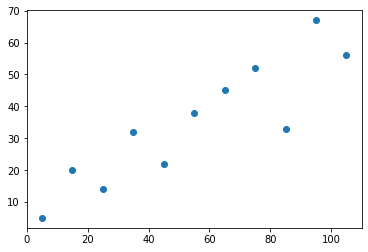

In [1]:
import matplotlib.pyplot as plt

x = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
y = [5, 20, 14, 32, 22, 38, 45, 52, 33, 67, 56]

plt.scatter(x, y)
plt.show()

In [2]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
# This method returns key values of Linear Regression

Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed

In [3]:
def Linearfunc(x):
  return slope * x + intercept

mymodel = list(map(Linearfunc, x))

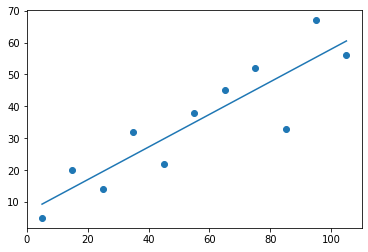

In [4]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [6]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Age-Height-Dataset.csv')

In [7]:
df

,Age,Height
0,63.0,151.765
1,63.0,139.700
2,65.0,136.525
3,41.0,156.845
4,51.0,145.415
...,...,...
539,17.0,145.415
540,31.0,162.560
541,21.0,156.210
542,0.0,71.120


In [8]:
df.describe()

,Age,Height
count,544.000000,544.000000
mean,29.344393,138.263596
std,20.746888,27.602448
min,0.000000,53.975000
25%,12.000000,125.095000
50%,27.000000,148.590000
75%,43.000000,157.480000
max,88.000000,179.070000


In [9]:
cleaned_data = df[df['Age'] > 0]
cleaned_data

,Age,Height
0,63.0,151.765
1,63.0,139.700
2,65.0,136.525
3,41.0,156.845
4,51.0,145.415
...,...,...
538,1.0,76.835
539,17.0,145.415
540,31.0,162.560
541,21.0,156.210


In [10]:
cleaned_data.describe()

,Age,Height
count,533.000000,533.000000
mean,29.950000,139.810134
std,20.522215,25.660586
min,0.600000,59.613800
25%,12.000000,127.990600
50%,28.000000,149.225000
75%,44.000000,157.480000
max,88.000000,179.070000


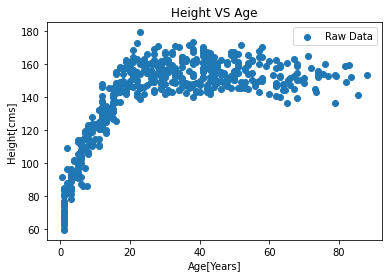

In [11]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[cms]')
plt.legend()

In [26]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(df.drop('Height',axis='columns').values,df.Height)

LinearRegression()

In [27]:
reg.coef_

array([0.90960522])

In [28]:
reg.intercept_

111.57178286909388

In [29]:
reg.predict([[41]])

array([148.86559697])

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [17]:
df1 = pd.read_csv('/content/drive/MyDrive/homeprices.csv')

In [18]:
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [19]:
df1.bedrooms.median()

4.0

In [20]:
df1.bedrooms = df1.bedrooms.fillna(df1.bedrooms.median())

In [30]:
reg = linear_model.LinearRegression()
reg.fit(df1.drop('price',axis='columns').values,df1.price)

LinearRegression()

In [31]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [32]:
reg.intercept_

221323.00186540396

In [33]:
#Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [34]:
#Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old
reg.predict([[2500, 4, 5]])

array([578876.03748933])